In [147]:
import pandas as pd
import pathpy as pp
import pathpy.algorithms.statistics as stat
import pathpy.algorithms.shortest_paths as shorty
import numpy as np
import math as m
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel (r'manufacturing_emails_temporal_network.xlsx')

In [5]:
nodes = pd.concat([df["node1"], df["node2"]]).unique()
N = len(nodes)
print (len(nodes))

links = df[["node1","node2"]]
links = links.drop_duplicates()
L = links.shape[0]

167


In [5]:
temporal = pp.TemporalNetwork()
for ind in df.index:
    temporal.add_edge(df['node1'][ind], df['node2'][ind], int(df['timestamp'][ind]))
print(temporal)

Nodes:			167
Time-stamped links:	82876
Links/Nodes:		496.2634730538922
Observation period:	[1, 57791]
Observation length:	 57790 
Time stamps:		 57791 
Avg. inter-event dt:	 1.0
Min/Max inter-event dt:	 1/1


In [6]:
# edges = temporal.filter_edges(lambda v, w, time: time == 1)

edges = df[df['timestamp'] == 2]


print(edges.head(20))

    node1  node2  timestamp
16     18     19          2


In [87]:
def infect_graph(seed):
    end = 57792
    infected = {seed}
    stop_t = 0
    infection_size = []
    for t in range(1, end):
        edges = df[df['timestamp'] == t].to_numpy()
        new_infections = set()
        for e in edges:
            if(e[0] in infected):
                new_infections.add(e[1])
            elif(e[1] in infected):
                new_infections.add(e[0])
        infected.update(new_infections)
        infection_size.append(len(infected))
#         print(new_infections)


        if(len(infected)/N*100 > 75):
            print(seed)
            print(f"Stopped at {t}")
            return t, infection_size

ts = {}
infection_times = {}
its = 0
for i in nodes:
    its = its + 1
    print(its)
    ts[i], infection_times[i] = infect_graph(i)
    

# infect_graph(4)

# df[df['timestamp'] == 1720].to_numpy()


1
1
Stopped at 257
2
18
Stopped at 345
3
3
Stopped at 262
4
20
Stopped at 262
5
24
Stopped at 363
6
26
Stopped at 329
7
28
Stopped at 449
8
29
Stopped at 449
9
11
Stopped at 270
10
21
Stopped at 262
11
36
Stopped at 507
12
13
Stopped at 330
13
8
Stopped at 345
14
4
Stopped at 345
15
42
Stopped at 293
16
47
Stopped at 421
17
22
Stopped at 262
18
17
Stopped at 345
19
55
Stopped at 365
20
50
Stopped at 345
21
27
Stopped at 329
22
19
Stopped at 345
23
23
Stopped at 262
24
2
Stopped at 345
25
33
Stopped at 363
26
62
Stopped at 378
27
7
Stopped at 345
28
5
Stopped at 329
29
10
Stopped at 345
30
15
Stopped at 345
31
35
Stopped at 338
32
12
Stopped at 345
33
30
Stopped at 449
34
6
Stopped at 345
35
43
Stopped at 293
36
48
Stopped at 421
37
79
Stopped at 507
38
38
Stopped at 507
39
25
Stopped at 363
40
14
Stopped at 345
41
68
Stopped at 410
42
84
Stopped at 461
43
69
Stopped at 380
44
76
Stopped at 505
45
64
Stopped at 414
46
57
Stopped at 362
47
54
Stopped at 410
48
32
Stopped at 363
49
45
Sto

In [127]:
# sts = np.sort(list(ts.values()))
print(ts)
mapped_ts = [{"id": i, "t": ts[i]} for i in range(1, len(ts)+1)]

bins = [ 200 + 10**x for x in np.arange(0,5, 0.2)]
print( bins)
plt.xscale('log')
plt.hist([x["t"] for x in mapped_ts], bins = bins, density=True, log=True)
# print(mapped_ts)

{1: 1720, 18: 1720, 3: 1720, 20: 1720, 24: 1720, 26: 1720, 28: 1720, 29: 1720, 11: 1720, 21: 1720, 36: 1720, 13: 1720, 8: 1720, 4: 1720, 42: 1720, 47: 1720, 22: 1720, 17: 1720, 55: 1720, 50: 1720, 27: 1720, 19: 1720, 23: 1720, 2: 1720, 33: 1720, 62: 1720, 7: 1720, 5: 1720, 10: 1720, 15: 1720, 35: 1720, 12: 1720, 30: 1720, 6: 1720, 43: 1720, 48: 1720, 79: 1720, 38: 1720, 25: 1720, 14: 1720, 68: 1720, 84: 1720, 69: 1720, 76: 1720, 64: 1720, 57: 1720, 54: 1720, 32: 1720, 45: 1720, 71: 1720, 39: 1720, 66: 1720, 59: 1720, 34: 1720, 44: 1720, 9: 1720, 74: 1720, 65: 1720, 72: 1720, 61: 1720, 88: 1720, 63: 1720, 70: 1720, 40: 1720, 37: 1720, 93: 1720, 98: 1720, 56: 1720, 80: 1720, 53: 1720, 52: 1720, 83: 1720, 86: 1720, 103: 1720, 31: 1720, 104: 1720, 77: 1720, 75: 1720, 49: 1720, 92: 1720, 67: 1720, 82: 1720, 41: 1720, 81: 1720, 106: 1720, 85: 1720, 58: 1720, 46: 1720, 89: 1720, 16: 1720, 97: 1720, 122: 2536, 146: 2536, 60: 1720, 87: 1720, 94: 1720, 90: 1720, 73: 1720, 95: 1720, 101: 1720, 10

In [19]:
net = pp.Network(directed=False)
np_links = links.to_numpy()
for l in np_links:
    net.add_edge(l[0], l[1])
print(net)

Undirected network
Nodes:				167
Links:				3250



In [128]:
agg_df = df.groupby(['node1', 'node2'], as_index=False).agg({"timestamp": "count"}).rename(columns={"timestamp": "weight"})

ds = []
ss = []

for n in nodes:
    edges = agg_df[np.logical_or(agg_df["node1"] == n, agg_df["node2"] == n)]
    ds.append({"id": n, "d": len(edges)})
    ss.append({"id": n, "s": edges["weight"].sum()})


[{'id': 1, 't': 1720}, {'id': 2, 't': 1720}, {'id': 3, 't': 1720}, {'id': 4, 't': 1720}, {'id': 5, 't': 1720}, {'id': 6, 't': 1720}, {'id': 7, 't': 1720}, {'id': 8, 't': 1720}, {'id': 9, 't': 1720}, {'id': 10, 't': 1720}, {'id': 11, 't': 1720}, {'id': 12, 't': 1720}, {'id': 13, 't': 1720}, {'id': 14, 't': 1720}, {'id': 15, 't': 1720}, {'id': 16, 't': 1720}, {'id': 17, 't': 1720}, {'id': 18, 't': 1720}, {'id': 19, 't': 1720}, {'id': 20, 't': 1720}, {'id': 21, 't': 1720}, {'id': 22, 't': 1720}, {'id': 23, 't': 1720}, {'id': 24, 't': 1720}, {'id': 25, 't': 1720}, {'id': 26, 't': 1720}, {'id': 27, 't': 1720}, {'id': 28, 't': 1720}, {'id': 29, 't': 1720}, {'id': 30, 't': 1720}, {'id': 31, 't': 1720}, {'id': 32, 't': 1720}, {'id': 33, 't': 1720}, {'id': 34, 't': 1720}, {'id': 35, 't': 1720}, {'id': 36, 't': 1720}, {'id': 37, 't': 1720}, {'id': 38, 't': 1720}, {'id': 39, 't': 1720}, {'id': 40, 't': 1720}, {'id': 41, 't': 1720}, {'id': 42, 't': 1720}, {'id': 43, 't': 1720}, {'id': 44, 't': 172

125.25

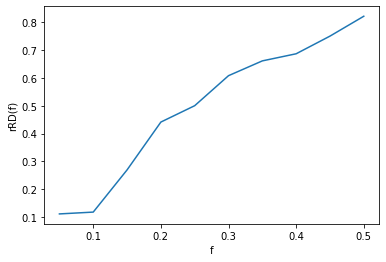

In [130]:
def calcRecRate(f, ranks, metric):
    n = m.ceil(len(ranks)*f)
    ranks = set([x["id"] for x in ranks[:n]])
    metric = set([x["id"] for x in metric[:n]])
    intersect = ranks.intersection(metric)
#     print(ranks)
#     print(metric)
#     print(intersect)
    return len(intersect)/n
    

ss = sorted(ss, key = lambda x: x["s"], reverse=True)
ds = sorted(ds, key = lambda x: x["d"], reverse=True)
rs = sorted(mapped_ts, key= lambda x: x["t"])
print(rs)

xs = np.arange(0.05, 0.55, step = 0.05)
ys = []

for f in xs:
    ys.append(calcRecRate(f, rs, ds))

plt.plot(xs, ys)
plt.xlabel("f")
plt.ylabel("rRD(f)")


167*0.75

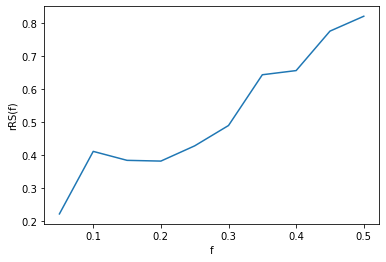

In [131]:
ys = []
for f in xs:
    ys.append(calcRecRate(f, rs, ss))
    
plt.xlabel("f")
plt.ylabel("rRS(f)")

plt.plot(xs, ys)

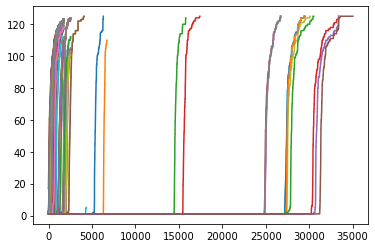

In [133]:
v = infection_times[1]

plt.plot([x for x in range(len(v))], v)

for k, v in infection_times.items():
    if(len(v) < 50000):
        plt.plot([x for x in range(len(v))], v)
plt.show()

In [117]:
def infect_M_graph(seed):
    end = 57792
    infected = {seed : 0}
    stop_t = 0
    infection_size = []
    for t in range(1, end):
        edges = df[df['timestamp'] == t].to_numpy()
        new_infections = set()
        for e in edges:
            if(e[0] in infected):
                new_infections.add(e[1])
            elif(e[1] in infected):
                new_infections.add(e[0])
        for inf in new_infections:
            if inf not in infected:
                infected[inf] = t
            if(len(infected.keys())/N*100 > 75):
                print(seed)
                print(f"Stopped at {t}")
                return t, infected, infection_size
        infection_size.append(len(infected))
#         print(new_infections)


        

ts = {}
infection_times = {}
infections = {}
its = 0
for i in nodes:
    its = its + 1
    print(its)
    ts[i], infections[i], infection_times[i] = infect_M_graph(i)

print(infections[1])

    

1
1
Stopped at 1720
2
18
Stopped at 1720
3
3
Stopped at 1720
4
20
Stopped at 1720
5
24
Stopped at 1720
6
26
Stopped at 1720
7
28
Stopped at 1720
8
29
Stopped at 1720
9
11
Stopped at 1720
10
21
Stopped at 1720
11
36
Stopped at 1720
12
13
Stopped at 1720
13
8
Stopped at 1720
14
4
Stopped at 1720
15
42
Stopped at 1720
16
47
Stopped at 1720
17
22
Stopped at 1720
18
17
Stopped at 1720
19
55
Stopped at 1720
20
50
Stopped at 1720
21
27
Stopped at 1720
22
19
Stopped at 1720
23
23
Stopped at 1720
24
2
Stopped at 1720
25
33
Stopped at 1720
26
62
Stopped at 1720
27
7
Stopped at 1720
28
5
Stopped at 1720
29
10
Stopped at 1720
30
15
Stopped at 1720
31
35
Stopped at 1720
32
12
Stopped at 1720
33
30
Stopped at 1720
34
6
Stopped at 1720
35
43
Stopped at 1720
36
48
Stopped at 1720
37
79
Stopped at 1720
38
38
Stopped at 1720
39
25
Stopped at 1720
40
14
Stopped at 1720
41
68
Stopped at 1720
42
84
Stopped at 1720
43
69
Stopped at 1720
44
76
Stopped at 1720
45
64
Stopped at 1720
46
57
Stopped at 1720
47
54

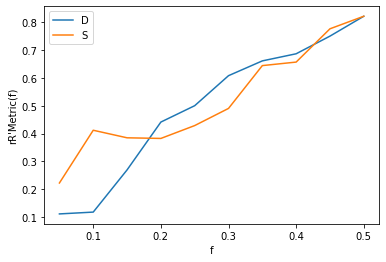

In [151]:
avgRs = []

for seed, infection in infections.items():
    avgRs.append({"id": seed, "avg": np.average(list(infection.values()))})
    
avgRs = sorted(avgRs, key = lambda x: x["avg"])


xs = np.arange(0.05, 0.55, step = 0.05)
metrics = {"R": rs, "D": ds, "S": ss, "Z" :mapped_zs}
metrics = {"D": ds, "S": ss}


for key, met in metrics.items(): 
    ys = []
    for f in xs:
        ys.append(calcRecRate(f, rs, met))

    plt.plot(xs, ys, label = key)


plt.xlabel("f")
plt.ylabel("rR'Metric(f)")
plt.legend()
plt.show()


In [140]:
def infect_graph_Z(seed):
    end = 57792
    infected = {seed}
    stop_t = 0
    for t in range(1, end):
        edges = df[df['timestamp'] == t].to_numpy()
        new_infections = set()
        for e in edges:
            if(e[0] in infected):
                new_infections.add(e[1])
            elif(e[1] in infected):
                new_infections.add(e[0])
        infected.update(new_infections)
#       print(new_infections)

        
        if(len(infected)>=2):
            print(seed)
            print(f"Stopped at {t}")
            return t

        
zs = {}
its = 0
for i in nodes:
    its = its + 1
    print(its)
    zs[i] = infect_graph_Z(i)
    

1
1
Stopped at 1
2
18
Stopped at 2
3
3
Stopped at 1
4
20
Stopped at 4
5
24
Stopped at 8
6
26
Stopped at 9
7
28
Stopped at 10
8
29
Stopped at 10
9
11
Stopped at 1
10
21
Stopped at 5
11
36
Stopped at 20
12
13
Stopped at 1
13
8
Stopped at 1
14
4
Stopped at 1
15
42
Stopped at 27
16
47
Stopped at 37
17
22
Stopped at 6
18
17
Stopped at 1
19
55
Stopped at 52
20
50
Stopped at 46
21
27
Stopped at 9
22
19
Stopped at 2
23
23
Stopped at 7
24
2
Stopped at 1
25
33
Stopped at 14
26
62
Stopped at 76
27
7
Stopped at 1
28
5
Stopped at 1
29
10
Stopped at 1
30
15
Stopped at 1
31
35
Stopped at 19
32
12
Stopped at 1
33
30
Stopped at 12
34
6
Stopped at 1
35
43
Stopped at 27
36
48
Stopped at 37
37
79
Stopped at 134
38
38
Stopped at 24
39
25
Stopped at 8
40
14
Stopped at 1
41
68
Stopped at 81
42
84
Stopped at 183
43
69
Stopped at 81
44
76
Stopped at 124
45
64
Stopped at 76
46
57
Stopped at 57
47
54
Stopped at 49
48
32
Stopped at 14
49
45
Stopped at 32
50
71
Stopped at 85
51
39
Stopped at 25
52
66
Stopped at 81

In [141]:
mapped_zs = []
for n in nodes:
    mapped_zs.append({"id": n, "z": zs[n]})
